**Stock Market Prediction And Forcasting Using Stacked LSTM**

**Gayatri Yadav**

**Mini Project**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import math
import numpy as np






In [ ]:
data= pd.read_csv('/content/drive/MyDrive/data/AAPL[1].csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0
...,...,...,...,...,...,...,...
9818,2019-11-19,267.899994,268.000000,265.390015,266.290009,266.290009,19041800.0
9819,2019-11-20,265.540009,266.079987,260.399994,263.190002,263.190002,26558600.0
9820,2019-11-21,263.690002,264.010010,261.179993,262.010010,262.010010,30348800.0
9821,2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9.822000e+03
mean,30.350057,30.640633,30.048298,30.352940,28.364033,8.620720e+07
std,53.443016,53.908364,52.983661,53.464270,51.603590,8.623138e+07
min,0.198661,0.198661,0.196429,0.196429,0.156008,3.472000e+05
25%,1.062500,1.085357,1.043571,1.066964,0.914089,3.318138e+07
50%,1.709286,1.742366,1.671429,1.712857,1.452872,5.798940e+07
75%,30.393928,30.555714,29.865358,30.233214,26.305946,1.076320e+08
max,267.899994,268.000000,265.390015,267.100006,267.100006,1.855410e+09


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9818,2019-11-19,267.899994,268.000000,265.390015,266.290009,266.290009,19041800.0
9819,2019-11-20,265.540009,266.079987,260.399994,263.190002,263.190002,26558600.0
9820,2019-11-21,263.690002,264.010010,261.179993,262.010010,262.010010,30348800.0
9821,2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0
9822,2019-11-25,262.709991,266.440002,262.519989,266.369995,266.369995,21005100.0


In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

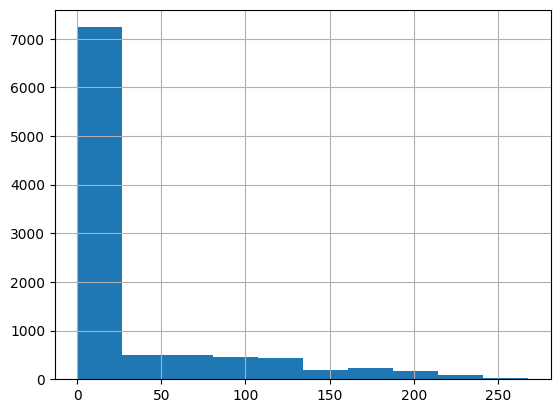

In [ ]:
data['High'].hist()

<Axes: >

<Figure size 2000x800 with 0 Axes>

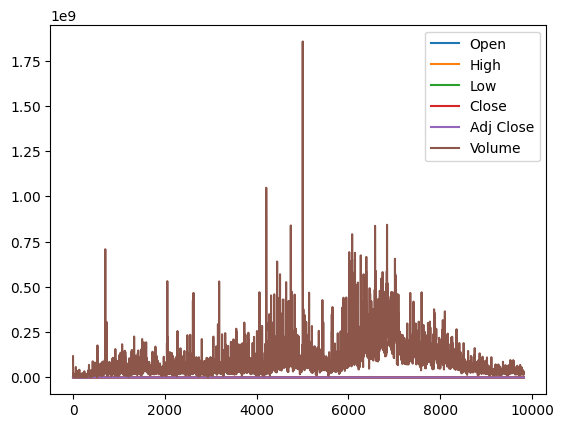

In [ ]:
plt.figure(figsize=(20,8))
data.plot()

In [ ]:
df1 = data.reset_index()["Close"]
df1.shape

(9823,)

In [ ]:
df1

0         0.513393
1         0.486607
2         0.450893
3         0.462054
4         0.475446
           ...    
9818    266.290009
9819    263.190002
9820    262.010010
9821    261.779999
9822    266.369995
Name: Close, Length: 9823, dtype: float64

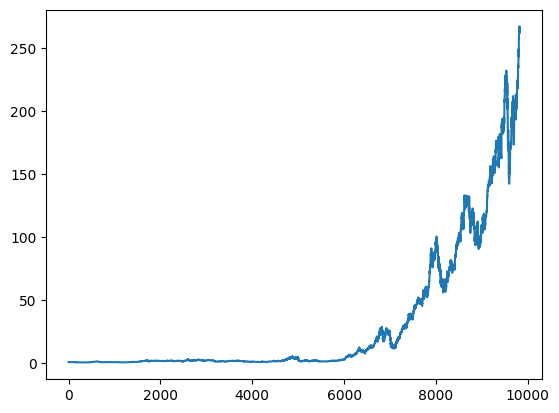

In [ ]:
plt.plot(df1)

**Scaling the data**

**applying minmax scaler**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))

In [ ]:
training_set= data.iloc[:,1:2].values
training_set


array([[  0.513393],
       [  0.488839],
       [  0.453125],
       ...,
       [263.690002],
       [262.589996],
       [262.709991]])

In [ ]:
data_training_scaled = scaler. fit_transform( training_set)

In [ ]:
feature_set =[]
labels=[]
for i in range(60,586):
   feature_set.append(data_training_scaled[i-60:i,0])
   labels.append(data_training_scaled[i,0])

In [ ]:
feature_set,labels = np.array(feature_set), np.array(labels)

In [ ]:
feature_set= np.reshape(feature_set,(feature_set.shape[0],feature_set.shape[1],1))
feature_set.shape


(526, 60, 1)

In [ ]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[1.18755996e-03],
       [1.08720162e-03],
       [9.53392993e-04],
       ...,
       [9.80929458e-01],
       [9.80067682e-01],
       [9.97264889e-01]])

**Splitting Dataset into training and testing sets**





In [ ]:
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_set= data.iloc[:,1:2].values
training_set


array([[  0.513393],
       [  0.488839],
       [  0.453125],
       ...,
       [263.690002],
       [262.589996],
       [262.709991]])

In [ ]:
len(train_data) , len(test_data)

(6384, 3439)

**converting an array of values into a dataset matrix**

**reshaping**

In [ ]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
print(X_train)

[[0.00118756 0.0010872  0.00095339 ... 0.00115411 0.00114574 0.00109556]
 [0.0010872  0.00095339 0.00099521 ... 0.00114574 0.00109556 0.00112066]
 [0.00095339 0.00099521 0.00104539 ... 0.00109556 0.00112066 0.00113738]
 ...
 [0.0284185  0.03008845 0.03004028 ... 0.03234715 0.03227222 0.03146401]
 [0.03008845 0.03004028 0.03135161 ... 0.03227222 0.03146401 0.03135696]
 [0.03004028 0.03135161 0.03236856 ... 0.03146401 0.03135696 0.03111611]]


In [ ]:
print(X_test.shape),print(y_test.shape)

(3338, 100)
(3338,)


(None, None)

In [ ]:
print(X_train.shape),print(y_train.shape)

(6283, 100)
(6283,)


(None, None)

Building the LSTM

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data_testing_complete = pd.read_csv('/content/drive/MyDrive/data/AAPL[1].csv')
data_testing_processed = data_testing_complete.iloc[:,1:2]
data_testing_processed

,Open
0,0.513393
1,0.488839
2,0.453125
3,0.462054
4,0.475446
...,...
9818,267.899994
9819,265.540009
9820,263.690002
9821,262.589996


Prediction of the Data

In [ ]:
data_total = pd.concat((data['Open'], data['Open']), axis=0)

In [ ]:
test_inputs=data_total[len(data_total) - len(data)-60:].values
test_inputs.shape

(9883,)

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_features =[]
for i in range(60,80):
  test_features.append(test_inputs[i-60:i,0])

In [ ]:
test_features=np.array(test_features)
test_features=np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))
test_features.shape

(20, 60, 1)

In [ ]:
test_features.shape

(20, 60, 1)

In [ ]:
predictions=model.predict(test_features)
predictions

array([[-0.01966177],
       [-0.01779423],
       [-0.01437158],
       [-0.01016708],
       [-0.00590789],
       [-0.0020925 ],
       [ 0.00101854],
       [ 0.00334872],
       [ 0.00493996],
       [ 0.00589713],
       [ 0.00634834],
       [ 0.00642079],
       [ 0.00622739],
       [ 0.00586097],
       [ 0.00539345],
       [ 0.00487796],
       [ 0.004352  ],
       [ 0.00384058],
       [ 0.00335912],
       [ 0.00291589]], dtype=float32)

In [ ]:
X_train = data[0:1256]
y_train = data[1:1257]
print(X_train.shape)
print(y_train.shape)

(1256, 7)
(1256, 7)


In [ ]:
X_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0
...,...,...,...,...,...,...,...
1251,1985-11-22,0.339286,0.343750,0.337054,0.339286,0.269467,32188800.0
1252,1985-11-25,0.339286,0.343750,0.339286,0.341518,0.271240,24298400.0
1253,1985-11-26,0.341518,0.348214,0.339286,0.345982,0.274786,41115200.0
1254,1985-11-27,0.345982,0.359375,0.343750,0.357143,0.283650,47930400.0


**Plotting the Result**

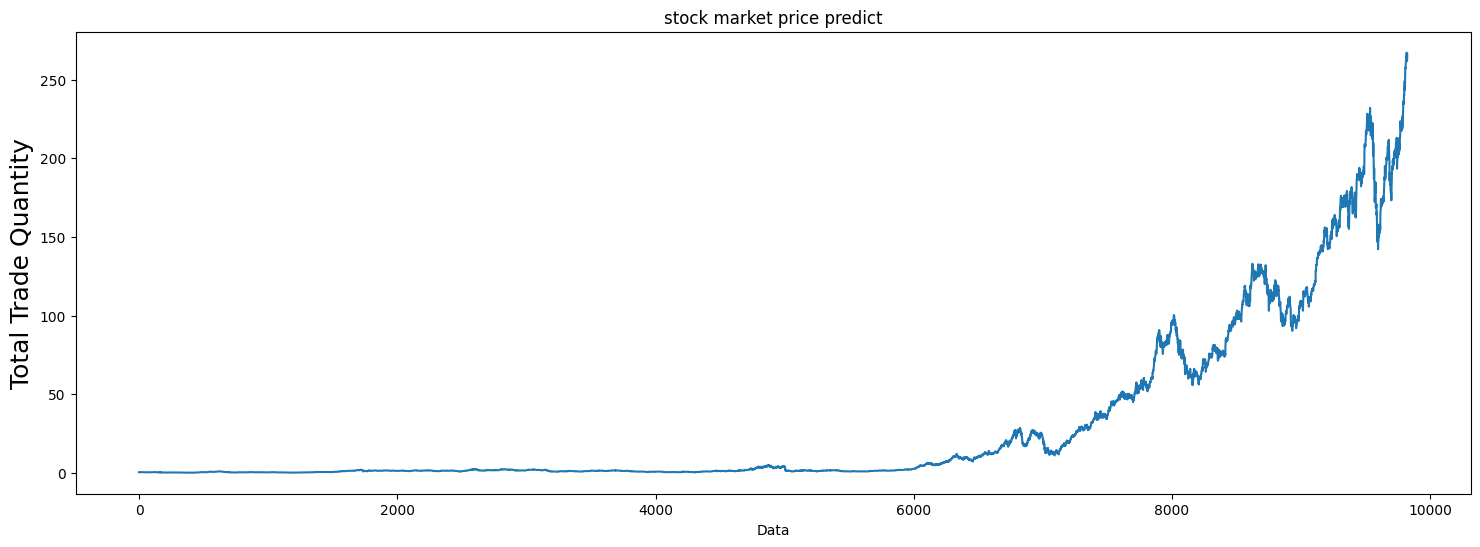

In [ ]:
plt.figure(figsize=(18,6))
plt.title('stock market price predict')
plt.plot(data_testing_complete['Close'])
plt.xlabel('Data',fontsize=10)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

**Analyzing the closing price frpm dataframe**

In [ ]:
import matplotlib.pyplot as plt


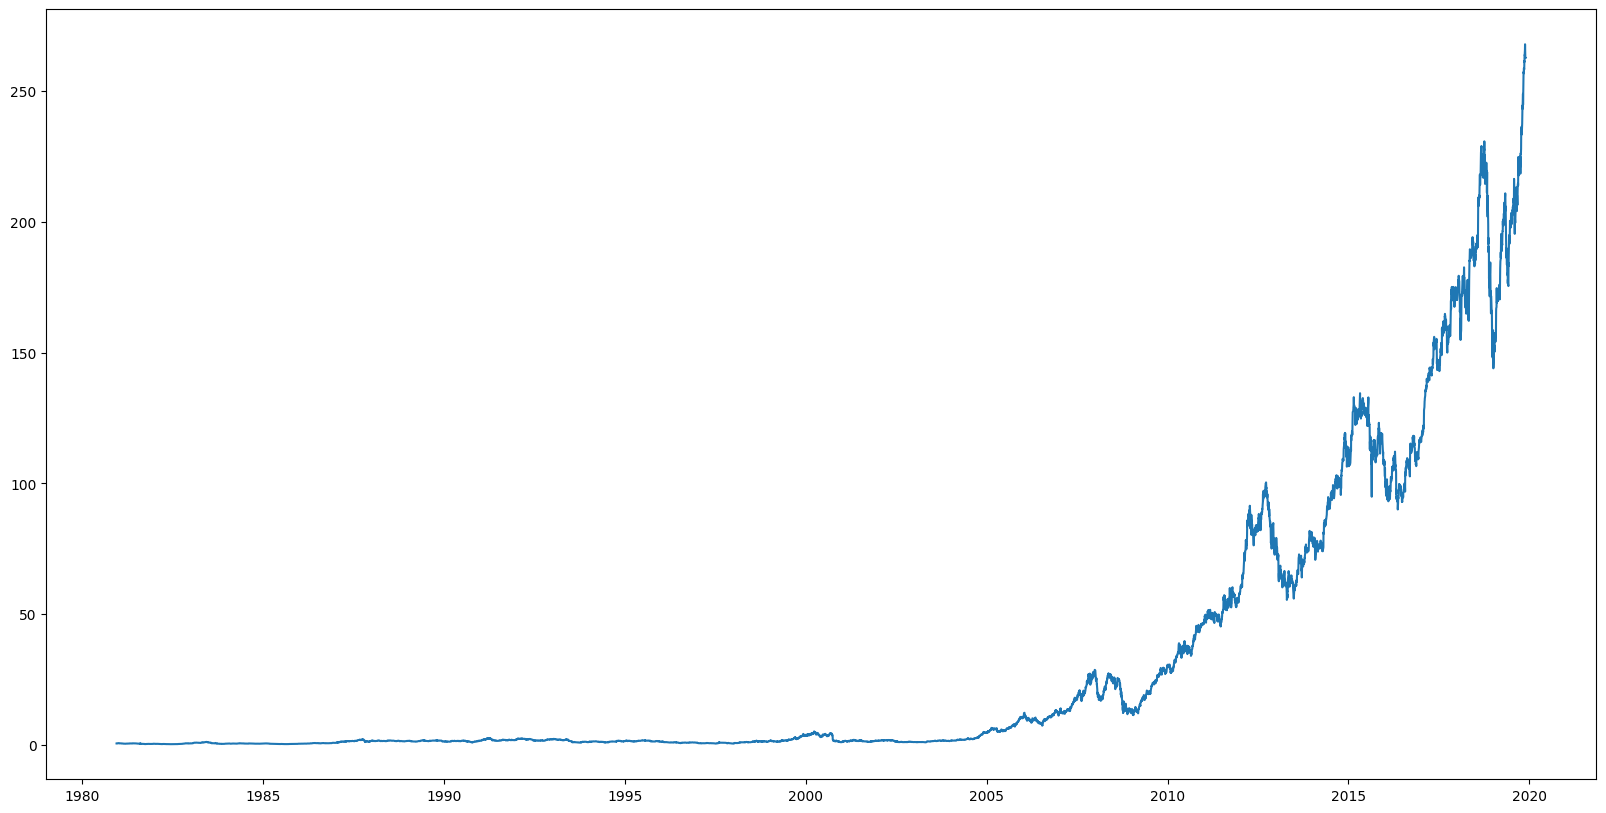

In [ ]:
data['Date'] = pd.to_datetime(data.Date)
data.index=data['Date']
#data.head()

plt.figure(figsize=(20,10))
plt.plot(data['Open'],label='ClosePriceHist')

**Analyzing the closing prices from dataframe**

Text(0, 0.5, 'total Trade Quantity')

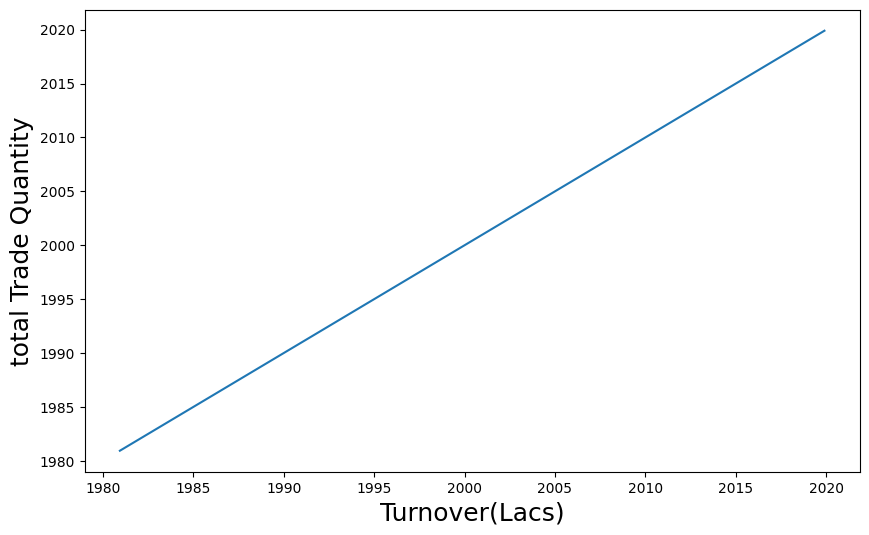

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'])
plt.xlabel('Turnover(Lacs)',fontsize = 18)
plt.ylabel('total Trade Quantity',fontsize =18)